In [2]:
using Distributed
ifelse(nprocs()<2, addprocs(3), nothing);

In [1]:
using Plots
using LinearAlgebra
using Revise
using LatticeQM

# Tutorial: Twisted honeycomb lattices

In [6]:
lat = Geometries2D.honeycomb_twisted(8)

Twist α=3.89°   (n,m)=(8,1)


Lattice dimension:     2
Space dimension:       3
Number of atoms:       868
Non-spatial dimension: 2
Basis:
3×3 Array{Float64,2}:
 25.5147       12.7574  0.0
 -8.74155e-15  22.0964  0.0
  0.0           0.0     1.0
Orbital/atom coordinates: 
5×868 Array{Float64,2}:
 0.0  0.0399386  0.0414747  0.0814132  …   0.884793   0.961598   0.963134
 0.0  0.998464   0.0368664  0.0353303      0.995392   0.998464   0.958525
 1.5  1.5        1.5        1.5           -1.5       -1.5       -1.5
 0.0  1.0        0.0        1.0            0.0        1.0        0.0
 0.0  0.0        0.0        0.0            1.0        1.0        1.0

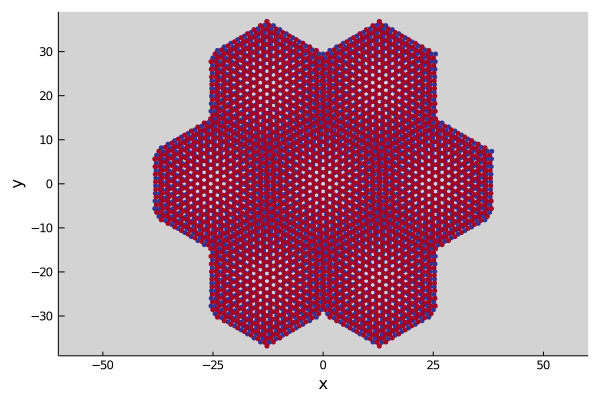

In [7]:
Structure.Lattices.foldPC!(lat; shift=[1/3,1/3,0])
plot(lat, 3; supercell=Structure.Lattices.getneighborcells(lat, 1; halfspace=false, innerpoints=true, excludeorigin=false), sort="layer", markersize=3)

## Model

In [20]:
hops = Operators.graphene(lat; tz=0.45, format=:sparse, mode=:nospin) # specifying format is important here!
Operators.setfilling!(hops,lat,0.5; nk=12)

nothing

Computing bands... 100%|████████████████████████████████| Time: 0:00:01


In [21]:
# Observables
valley = Operators.valley(lat; spinhalf=false);

### Bands

In [22]:
ks = kpath(lat, ["μ2", "γ", "κ", "κ'", "γ", "μ"]; num_points=100)
bands = getbands(hops, ks, valley; format=:sparse, num_bands=25)

Computing bands... 100%|████████████████████████████████| Time: 0:00:03


Number of bands:      25
Number of k-points:   100
Number of observables: 1
Discrete Path: $\mu_2$→$\gamma$→$\kappa$→$\kappa'$→$\gamma$→$\mu$  (100 points)


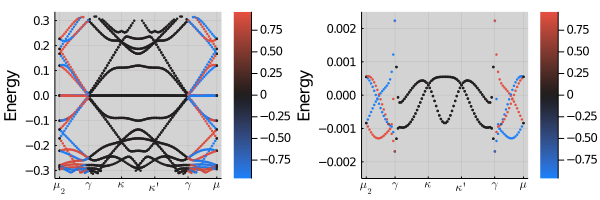

In [31]:
p1 = plot(bands; size=(300,250), markercolor=:diverging_bkr_55_10_c35_n256, colorbar=true)
p2 = plot(bands; ylim=(-0.0025,0.0025), size=(300,250), markercolor=:diverging_bkr_55_10_c35_n256, colorbar=true)

plot(p1,p2; size=(600,200))

In [38]:
hops = Operators.graphene(lat; mode=:spinhalf, format=:sparse, tz=0.45)
Operators.addrashba!(hops, lat, r -> 0.04 * sign(r[3]))
Operators.addzeeman!(hops, lat, r -> 0.04 * [0.0, 0.0, sign(r[3])])
Operators.setfilling!(hops,lat,0.5; nk=12)

# kgrid = LatticeQM.Utils.randomgrid(;nk=8^2, rot_symmetry=6, B=Structure.getB(lat))
kgrid = LatticeQM.Utils.regulargrid(;nk=8^2)
ωs = collect(range(-0.0015, length=100, stop=0.001))
ldos = Spectrum.ldos(hops, kgrid, ωs; Γ=0.0005, format=:sparse, num_bands=25);

Computing bands... 100%|████████████████████████████████| Time: 0:00:05
Computing LDOS...100%|██████████████████████████████████| Time: 0:00:17


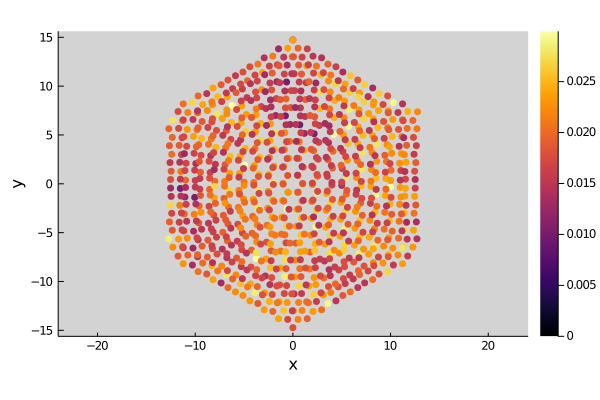

In [39]:
plot(lat, ldos; clims=(0,maximum(ldos)), markercolor=:inferno, colorbar=true)